## Loading data and dependencies

###  Load the necessary packages

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from typing import *
import torch
import torch.optim as optim

from fastai import *
from fastai.text import *
from pytorch_transformers import *


from fastai.basic_train import *
from fastai.basic_train import BasicLearner
import sys
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
import numpy as np

In [47]:
from exp.nb_Frame import *

NameError: name 'pd' is not defined

In [3]:



from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score

In [3]:
## load ggplot support

import rpy2

# the base of rpy2 plotting is matplotlib, thus we need to declare
# it inline in order to see the plots in the notebook
%matplotlib inline

# we need to activate the automatic conversion for pandas
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# load the needed extension for the %%R cell magic
%load_ext rpy2.ipython

###  Read in the data and split them

#### Read and process Ag_news data

In [4]:
DATA = Path(os.getcwd())/'Data'
AG_NEWS = Path(os.getcwd())/'Data'/'Ag_news'
header = ['class', 'title', 'describ']

In [5]:

#AG_NEWS_train = pd.read_csv(AG_NEWS_folder/'train.csv', names = header)

# sample a smaller version  


# AG_NEWS_TRAIN = AG_NEWS_TRAIN.iloc[:, 1:4]
# AG_NEWS_TRAIN.head()


In [5]:
# set the class dict for the class col
class_dict = {1: 'world', 
             2: 'sports',
             3: 'business',
             4: 'sci_tech'}

In [6]:
#AG_NEWS_TRAIN.to_feather(AG_NEWS/'training_30k')
AG_NEWS_TRAIN = pd.read_feather(AG_NEWS/'training_30k')
AG_NEWS_TRAIN['class'] = AG_NEWS_TRAIN['class'].map(class_dict)
AG_NEWS_TRAIN = AG_NEWS_TRAIN.sample(10000, axis= 0)
AG_NEWS_TRAIN = AG_NEWS_TRAIN.reset_index()
AG_NEWS_TRAIN = AG_NEWS_TRAIN.iloc[:, 1:4]
AG_NEWS_TRAIN.shape
#AG_NEWS_TRAIN.head()

(10000, 3)

In [9]:
#AG_NEWS_train['class'].value_counts() # evenly distributed with each class of size 30000

In [12]:
AG_NEWS_TEST = pd.read_csv(AG_NEWS/'test.csv', names = header)

#### read Dbpedia data 

In [53]:
DATA = Path(os.getcwd())/'Data'

DBPEDIA = DATA/'Dbpedia'
DBPEDIA.mkdir(exist_ok= True)
header = ['class', 'title', 'contents']

In [54]:
#DBPEDIA_train = pd.read_csv(DBPEDIA/'train.csv', names= header)

#DBPEDIA_train.shape # 559999 data entries


# sample a smaller version  

# DBPEDIA_TRAIN = DBPEDIA_train.sample(30000, axis= 0)
# DBPEDIA_TRAIN = DBPEDIA_TRAIN.reset_index()
# DBPEDIA_TRAIN = DBPEDIA_TRAIN.iloc[:, 1:4]
# DBPEDIA_TRAIN['class'].unique() #14 classes 

# DBPEDIA_TRAIN.to_feather(DBPEDIA/'training_30k')
DBPEDIA_TRAIN = pd.read_feather(DBPEDIA/'training_30k')
# read in the class dict
with open(DBPEDIA/'classes.txt', 'r') as f:
    class_ls = f.readlines()

class_ls = [re.sub('\n', "", i) for i in class_ls]

class_dict = {k:v for k, v in enumerate(class_ls)}

DBPEDIA_TRAIN['class'] = DBPEDIA_TRAIN['class'].map(class_dict) # The data has been class transformed
DBPEDIA_TRAIN = DBPEDIA_TRAIN[DBPEDIA_TRAIN['class'].notnull()] # mislabled one class in original dataset; filtered out here
DBPEDIA_TRAIN.shape

(27841, 3)

In [55]:
DBPEDIA_TRAIN.head()

,class,title,contents
0,Building,Peckett OQ Class,The Peckett OQ was a series of three Industri...
1,NaturalPlace,Yas Viceroy Abu Dhabi Hotel,Yas Viceroy Abu Dhabi Hotel is built across t...
2,Athlete,Stephen Frink,Stephen Frink is a prolific underwater photog...
3,Album,Centaurea diffusa,Diffuse Knapweed (Centaurea diffusa) also kno...
4,Village,Djedi River,Djedi River (French: Oued Djedi or Ouad-ed-Dj...


In [17]:
#DBPEDIA_test = pd.read_csv(DBPEDIA/'test.csv', names= header)

# DBPEDIA_TEST = DBPEDIA_test.sample(28000, axis= 0)
# DBPEDIA_TEST = DBPEDIA_TEST.reset_index()
# DBPEDIA_TEST = DBPEDIA_TEST.iloc[:, 1:4]
# DBPEDIA_TEST["class"].unique() #14 classes

# DBPEDIA_TEST.to_feather(DBPEDIA/'TESTING')
DBPEDIA_TEST = pd.read_feather(DBPEDIA/'TESTING')

#### read Yelp review data

In [63]:
YELP = DATA/'Yelp'
YELP.mkdir(exist_ok= True)
header = ['class', 'review']

In [64]:
# YELP_train = pd.read_csv(YELP/'train.csv', names= header)

# #DBPEDIA_train.shape # 559999 data entries


# # sample a smaller version

# YELP_TRAIN = YELP_train.sample(30000, axis= 0)
# YELP_TRAIN = YELP_TRAIN.reset_index()
# YELP_TRAIN = YELP_TRAIN.iloc[:, 1:3]

# # YELP_TRAIN.to_feather(YELP/'training_30k')
# YELP_TRAIN = pd.read_feather(YELP/'training_30k')

    
# YELP_TRAIN = YELP_TRAIN.sample(12500, axis= 0)
# YELP_TRAIN = YELP_TRAIN.reset_index()
# YELP_TRAIN = YELP_TRAIN.iloc[:, 1:3]

# YELP_TRAIN.to_feather(YELP/'training_10k')
YELP_TRAIN = pd.read_feather(YELP/'training_10k')


In [65]:
YELP_TRAIN.head()

,class,title
0,1,The apartment I rented was infested with scorp...
1,4,It seems like other folks had different experi...
2,5,Our first visit to this store was to go to the...
3,3,So nice to have a little wine spot in the neig...
4,3,Just your typical Arizonian Italian restaurant


In [23]:
#YELP_test = pd.read_csv(YELP/'test.csv', names = header)

# YELP_TEST = YELP_test.sample(10000, axis= 0)
# YELP_TEST = YELP_TEST.reset_index()
# YELP_TEST = YELP_TEST.iloc[:, 1:4]
# YELP_TEST["class"].unique() 

# YELP_TEST.to_feather(YELP/'TESTING')
YELP_TEST = pd.read_feather(YELP/'TESTING')

#### read Amazon review data

In [75]:
AMAZON = DATA/'Amazon_full'
AMAZON.mkdir(exist_ok= True)
header = ['class', 'title', 'review']

In [22]:
#AMAZON_train = pd.read_csv(AMAZON/'train.csv', names= header)


In [76]:
# sample a smaller version

# AMAZON_TRAIN = AMAZON_train.sample(12500, axis= 0)
# AMAZON_TRAIN = AMAZON_TRAIN.reset_index()
# AMAZON_TRAIN = AMAZON_TRAIN.iloc[:, 1:4]

# AMAZON_TRAIN.to_feather(AMAZON/'training_10k')
AMAZON_TRAIN = pd.read_feather(AMAZON/'training_10k')

In [77]:
AMAZON_TRAIN.head(2)

,class,title,review
0,1,Kindle version only,From reading the other comments the book sound...
1,4,A Perfect Family Film!!!,This was a really good movie about a little gi...


#### read customer complaints data

In [87]:
CUSTOMER = DATA/'Customer'
CUSTOMER.mkdir(exist_ok=True)

In [88]:
# CUSTOMER_train = pd.read_csv(CUSTOMER/'complaints.csv')


# CUSTOMER_train.shape

# header = ['Product', 'Consumer complaint narrative']
# CUSTOMER_train = CUSTOMER_train[header]

# CUSTOMER_train = CUSTOMER_train.loc[pd.notnull(CUSTOMER_train['Consumer complaint narrative']), :]
# CUSTOMER_train.shape


# CUSTOMER_TRAIN = CUSTOMER_train.sample(12500, axis= 0)
# CUSTOMER_TRAIN = CUSTOMER_TRAIN.reset_index()
# CUSTOMER_TRAIN = CUSTOMER_TRAIN.iloc[:, 1:3]
# CUSTOMER_TRAIN.columns = ['product', 'complaint']

# CUSTOMER_TRAIN.to_feather(CUSTOMER/'training_10k')
CUSTOMER_TRAIN = pd.read_feather(CUSTOMER/'training_10k')

In [89]:
CUSTOMER_TRAIN.head()

,product,complaint
0,Debt collection,"For over a month, I have been getting calls fr..."
1,"Credit reporting, credit repair services, or o...","XX/XX/XXXX, a series on letters to XXXX XXXX X..."
2,Mortgage,I recently received a statement from Wells Far...
3,"Credit reporting, credit repair services, or o...",I have been disputing XXXX XXXX XXXX account i...
4,"Credit reporting, credit repair services, or o...","I have several student loans on my account, in..."


## Evaluate algorithums across datasets


### Evaluate algorithm, marginize over #training and # class

#### Ag_news boostrap

##### ML models

In [13]:
df = AG_NEWS_TRAIN # set df as inner pointer to this dataset
df.head(2)

,class,title,describ
0,world,Demobilized Soldiers Take Over Aristide #39;s ...,Dozens of demobilized soldiers have taken over...
1,sci_tech,Mars rovers working overtime,Martian rovers Spirit and Opportunity are goin...


In [7]:
# Set the global vars for this dataset for diverse algorithums

df['category_id'] = df['class'].factorize()[0]

category_id_df = df[['class', 'category_id']
                    ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = {v: k for k, v in category_to_id.items()}

In [11]:
# tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
#                         encoding='latin-1', ngram_range=(1, 3), stop_words='english')

# features = tfidf.fit_transform(df.describ).toarray()  # features is the global var for this dataset block

# labels = df.category_id  # labels also a global var

# features.shape  # of size (30000, 24903)

(10000, 9065)

**The models haven been run and results saved,  thus no need to run the code below**

In [12]:
# models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
#           LinearSVC(),
#           MultinomialNB(),
#           LogisticRegression(random_state=0, max_iter= 200)]

# boot_num = 2
# CV = 5
# cv_df = pd.DataFrame(index=range(CV * len(models)))
# entries = []

# for i in range(boot_num):
#     for model in models:
#         model_name = model.__class__.__name__
#         accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
#         for _, accuracy in enumerate(accuracies):
#             #print(f'finished {model_name}, {i}th bootstrap of {_}th epochs')
#             entries.append((model_name, accuracy))

        
# cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

In [64]:
#cv_df.to_csv(AG_NEWS/'ml_agnews_accu_10', index = False)
ml_agnews_accu_10 = pd.read_csv(AG_NEWS/'ml_agnews_accu_10')
ml_agnews_accu_10

,model_name,accuracy
0,RandomForestClassifier,0.7155
1,RandomForestClassifier,0.6980
2,RandomForestClassifier,0.7285
3,RandomForestClassifier,0.7170
4,RandomForestClassifier,0.6925
5,LinearSVC,0.8740
6,LinearSVC,0.8725
7,LinearSVC,0.8825
8,LinearSVC,0.8800
9,LinearSVC,0.8830


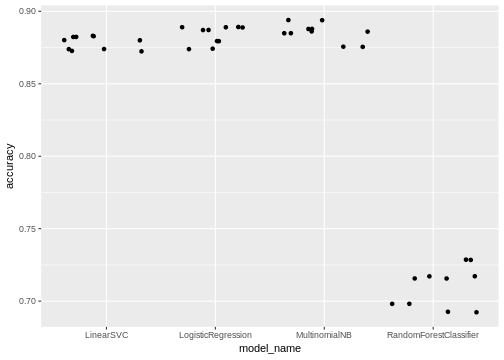

In [32]:
%%R -i cv_df -w 7 -h 5 -u in 

library(ggplot2)
ggplot(cv_df, aes(x= model_name)) +
    geom_jitter(aes(y = accuracy) )



##### DL methods

In [7]:
# basic block
from pytorch_transformers import *


class Config(dict):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        for k, v in kwargs.items():
            setattr(self, k, v)

    def set(self, key, val):
        self[key] = val
        setattr(self, key, val)


config = Config(
    bert_model_name="bert-base-uncased",
    max_lr=3e-5,
    epochs=1,
    use_fp16=True,
    bs= 32,
    discriminative=False,
    max_seq_len=128,
   # num_labels=4  # Remember to set the num_labels here
)

bert_tok = BertTokenizer.from_pretrained(
    config.bert_model_name,
)


class FastAiBertTokenizer(BaseTokenizer):
    """Wrapper around BertTokenizer to be compatible with fast.ai"""

    def __init__(self, tokenizer: BertTokenizer, max_seq_len: int = 128, **kwargs):
        self._pretrained_tokenizer = tokenizer
        self.max_seq_len = max_seq_len

    def __call__(self, *args, **kwargs):
        return self

    def tokenizer(self, t: str) -> List[str]:
        """Limits the maximum sequence length"""
        return ["[CLS]"] + self._pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2] + ["[SEP]"]


fastai_tokenizer = Tokenizer(tok_func=FastAiBertTokenizer(
    bert_tok, max_seq_len=config.max_seq_len), pre_rules=[], post_rules=[])

fastai_bert_vocab = Vocab(list(bert_tok.vocab.keys()))



loss_func = nn.CrossEntropyLoss()


def loss_batch_bert(model: nn.Module, xb: Tensor, yb: Tensor, loss_func: OptLossFunc = None, opt: OptOptimizer = None,
                    cb_handler: Optional[CallbackHandler] = None) -> Tuple[Union[Tensor, int, float, str]]:
    "Calculate loss and metrics for a batch, call out to callbacks as necessary."
    cb_handler = ifnone(cb_handler, CallbackHandler())
    if not is_listy(xb):
        xb = [xb]
    if not is_listy(yb):
        yb = [yb]
    out = model(*xb)
    # pdb.set_trace()
    out = out[0]
    out = cb_handler.on_loss_begin(out)

    if not loss_func:
        return to_detach(out), yb[0].detach()
    loss = loss_func(out, *yb)

    if opt is not None:
        loss, skip_bwd = cb_handler.on_backward_begin(loss)
        if not skip_bwd:
            loss.backward()
        if not cb_handler.on_backward_end():
            opt.step()
        if not cb_handler.on_step_end():
            opt.zero_grad()

    return loss.detach().cpu()


# To change the loss_batch function in the loaded fastai module
module_basic_train = sys.modules['fastai.basic_train']
module_basic_train.loss_batch = loss_batch_bert
sys.modules['fastai.basic_train'] = module_basic_train

In [14]:
#train, val = train_test_split(df)
label_cols = ['class']

#bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= config.num_labels)

accus = []

# use StratifiedKFold to CV 5 folds 
for train_idx, val_idx in StratifiedKFold(n_splits=5,  shuffle=True).split(df, df['class']):
    train = df.iloc[train_idx, :]
    val = df.iloc[val_idx, :]
    bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= 4)
    
    databunch = TextDataBunch.from_df(AG_NEWS, train, val,
                      tokenizer=fastai_tokenizer,
                      vocab=fastai_bert_vocab,
                      include_bos=False,
                      include_eos=False,
                      text_cols= "describ",
                      label_cols=label_cols,
                      bs= 64,
                      collate_fn=partial(pad_collate, pad_first=False, pad_idx=0),
                 )
    
    learner = Learner(
    databunch, bert_model,
    loss_func=loss_func, metrics = accuracy)

    learner.fit_one_cycle(5, 1e-04)
    _, accu = learner.validate()
    accus.append(accu)
    


In [43]:
accus = [i.item() for i in accus]

In [44]:
accus

[0.9104999899864197,
 0.921500027179718,
 0.9235000014305115,
 0.9144999980926514,
 0.9114999771118164]

In [45]:
bert_agnews_accu_5 = pd.DataFrame({
    'model_name' : ['Bert'] * 5,
    'accuracy' : accus
})

bert_agnews_accu_5.to_csv(AG_NEWS/'bert_agnews_accu_5', index = False)
bert_agnews_accu_5 = pd.read_csv(AG_NEWS/'bert_agnews_accu_5')

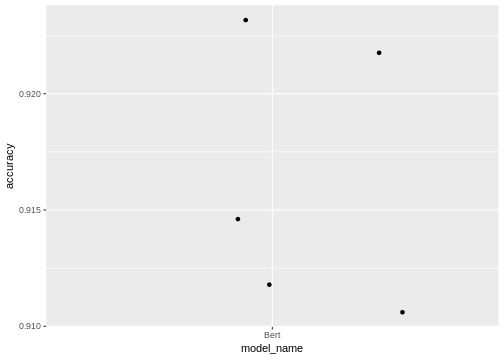

In [46]:
%%R -i bert_agnews_accu_5 -w 7 -h 5 -u in 
#library(ggplot2)
ggplot(bert_agnews_accu_5, aes(x= model_name)) +
    geom_jitter(aes(y = accuracy) )



#### Dbpedia data

##### ML part

In [10]:
df = DBPEDIA_TRAIN # set df as inner pointer to this dataset
df.head(2)

# Set the global vars for this dataset for diverse algorithums

df['category_id'] = df['class'].factorize()[0]

category_id_df = df[['class', 'category_id']
                    ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = {v: k for k, v in category_to_id.items()}

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

features = tfidf.fit_transform(df.contents).toarray()  # features is the global var for this dataset block

labels = df.category_id  # labels also a global var

features.shape  # of size (30000, 24903)

models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0, max_iter= 200)]

boot_num = 2
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for i in range(boot_num):
    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
        for _, accuracy in enumerate(accuracies):
            print(f'finished {model_name}, {i}th bootstrap of {_}th epochs')
            entries.append((model_name, accuracy))

        
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

finished RandomForestClassifier, 0th bootstrap of 0th epochs
finished RandomForestClassifier, 0th bootstrap of 1th epochs
finished RandomForestClassifier, 0th bootstrap of 2th epochs
finished RandomForestClassifier, 0th bootstrap of 3th epochs
finished RandomForestClassifier, 0th bootstrap of 4th epochs
finished LinearSVC, 0th bootstrap of 0th epochs
finished LinearSVC, 0th bootstrap of 1th epochs
finished LinearSVC, 0th bootstrap of 2th epochs
finished LinearSVC, 0th bootstrap of 3th epochs
finished LinearSVC, 0th bootstrap of 4th epochs
finished MultinomialNB, 0th bootstrap of 0th epochs
finished MultinomialNB, 0th bootstrap of 1th epochs
finished MultinomialNB, 0th bootstrap of 2th epochs
finished MultinomialNB, 0th bootstrap of 3th epochs
finished MultinomialNB, 0th bootstrap of 4th epochs
finished LogisticRegression, 0th bootstrap of 0th epochs
finished LogisticRegression, 0th bootstrap of 1th epochs
finished LogisticRegression, 0th bootstrap of 2th epochs
finished LogisticRegress

In [11]:
cv_df.to_csv(DBPEDIA/'ml_dbpedia_accu_10', index = False)
ml_dbpedia_accu_10 = pd.read_csv(DBPEDIA/'ml_dbpedia_accu_10')
ml_dbpedia_accu_10

,model_name,accuracy
0,RandomForestClassifier,0.811995
1,RandomForestClassifier,0.815374
2,RandomForestClassifier,0.817349
3,RandomForestClassifier,0.815553
4,RandomForestClassifier,0.818068
5,LinearSVC,0.976836
6,LinearSVC,0.975036
7,LinearSVC,0.976293
8,LinearSVC,0.971085
9,LinearSVC,0.970726


##### DL part

In [90]:
label_cols = ['class']
accus = []

# use StratifiedKFold to CV 5 folds 
for train_idx, val_idx in StratifiedKFold(n_splits=5,  shuffle=True).split(df, df['class']):
    train = df.iloc[train_idx, :]
    val = df.iloc[val_idx, :]
    bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= 13)
    
    databunch = TextDataBunch.from_df(DBPEDIA, train, val,
                      tokenizer=fastai_tokenizer,
                      vocab=fastai_bert_vocab,
                      include_bos=False,
                      include_eos=False,
                      text_cols= "contents",
                      label_cols=label_cols,
                      bs= 64,
                      collate_fn=partial(pad_collate, pad_first=False, pad_idx=0),
                 )
    
    learner = Learner(
    databunch, bert_model,
    loss_func=loss_func, metrics = accuracy)

    learner.fit_one_cycle(5, 1e-04, moms=(0.8,0.7))
    _, accu = learner.validate()
    accus.append(accu)

epoch,train_loss,valid_loss,accuracy,time
0,0.101611,0.057224,0.988508,02:49
1,0.066836,0.067512,0.984917,02:49
2,0.039955,0.052604,0.988508,02:49
3,0.022419,0.044344,0.990663,02:49
4,0.012598,0.043295,0.992279,02:49


epoch,train_loss,valid_loss,accuracy,time
0,0.127935,0.071032,0.985991,03:11
1,0.081126,0.069929,0.984555,02:57
2,0.030810,0.064293,0.988147,03:08
3,0.015263,0.054442,0.988865,02:58
4,0.006597,0.059375,0.989045,02:51


epoch,train_loss,valid_loss,accuracy,time
0,0.122561,0.074562,0.986530,03:14
1,0.077386,0.065294,0.985991,02:50
2,0.038542,0.069332,0.983118,03:10
3,0.017741,0.053479,0.987967,03:09
4,0.012268,0.055812,0.990302,03:00


epoch,train_loss,valid_loss,accuracy,time
0,0.131571,0.073313,0.986889,03:19
1,0.074705,0.056656,0.987428,03:11
2,0.047166,0.055322,0.985632,03:13
3,0.019190,0.051438,0.988506,03:04
4,0.008112,0.050731,0.990122,03:19


epoch,train_loss,valid_loss,accuracy,time
0,0.132279,0.066882,0.987249,02:56
1,0.070772,0.063918,0.985991,03:17
2,0.040303,0.053309,0.988326,03:13
3,0.021852,0.054179,0.987249,02:49
4,0.008462,0.054850,0.987967,02:53


In [96]:
#learner.save('dbpedia_learner_bert')
learner.load('dbpedia_learner_bert')

Learner(data=TextClasDataBunch;

Train: LabelList (22273 items)
x: TextList
[CLS] ya ##s viceroy abu dhabi hotel is built across the f1 ya ##s marina circuit in abu dhabi . [SEP],[CLS] stephen fr ##ink is a prolific underwater photographer and frequent contributor to scuba diving magazine . fr ##ink was born in illinois and moved to key la ##rgo florida in 1978 where he currently lives with his wife and daughter . he is often cited as one of the most frequently published underwater photographers in the world . [ 1 ] [ 2 ] [ 3 ] [SEP],[CLS] diffuse kn ##ap ##weed ( cent ##aur ##ea di ##ff ##usa ) also known as white kn ##ap ##weed or tumble kn ##ap ##weed is a member of the genus cent ##aur ##ea in the family as ##tera ##ceae . [SEP],[CLS] dj ##ed ##i river ( french : ou ##ed dj ##ed ##i or ou ##ad - ed - dj ##ed ##i ) or dj ##edd ##i river is a wadi ( river with intermittent stream ) in algeria and one of the largest rivers of sahara . it starts in the saharan atlas mountains at elevat

In [97]:
interp = ClassificationInterpretation.from_learner(learner)

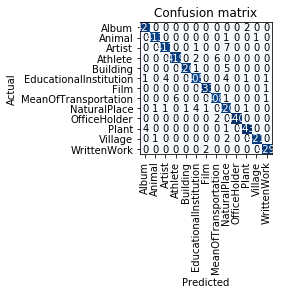

In [99]:
interp.plot_confusion_matrix()

In [93]:
accus = [i.item() for i in accus]
bert_dbpedia_accu_5 = pd.DataFrame({
    'model_name' : ['Bert'] * 5,
    'accuracy' : accus
})

bert_dbpedia_accu_5.to_csv(DBPEDIA/'bert_dbpedia_accu_5.csv', index = False)
bert_dbpedia_accu_5 = pd.read_csv(DBPEDIA/'bert_dbpedia_accu_5.csv')

#### Yelp review data

##### ML

In [8]:
df = YELP_TRAIN

In [9]:
df.shape

(12500, 2)

In [10]:


# Set the global vars for this dataset for diverse algorithums

df['category_id'] = df['class'].factorize()[0]

category_id_df = df[['class', 'category_id']
                    ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = {v: k for k, v in category_to_id.items()}

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

features = tfidf.fit_transform(df.title).toarray()  # features is the global var for this dataset block

labels = df.category_id  # labels also a global var

features.shape

(12500, 25186)

In [11]:

models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0, max_iter= 200)]

boot_num = 2
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for i in range(boot_num):
    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
        for _, accuracy in enumerate(accuracies):
            print(f'finished {model_name}, {i}th bootstrap of {_}th epochs')
            entries.append((model_name, accuracy))

        
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

finished RandomForestClassifier, 0th bootstrap of 0th epochs
finished RandomForestClassifier, 0th bootstrap of 1th epochs
finished RandomForestClassifier, 0th bootstrap of 2th epochs
finished RandomForestClassifier, 0th bootstrap of 3th epochs
finished RandomForestClassifier, 0th bootstrap of 4th epochs
finished LinearSVC, 0th bootstrap of 0th epochs
finished LinearSVC, 0th bootstrap of 1th epochs
finished LinearSVC, 0th bootstrap of 2th epochs
finished LinearSVC, 0th bootstrap of 3th epochs
finished LinearSVC, 0th bootstrap of 4th epochs
finished MultinomialNB, 0th bootstrap of 0th epochs
finished MultinomialNB, 0th bootstrap of 1th epochs
finished MultinomialNB, 0th bootstrap of 2th epochs
finished MultinomialNB, 0th bootstrap of 3th epochs
finished MultinomialNB, 0th bootstrap of 4th epochs
finished LogisticRegression, 0th bootstrap of 0th epochs
finished LogisticRegression, 0th bootstrap of 1th epochs
finished LogisticRegression, 0th bootstrap of 2th epochs
finished LogisticRegress

In [12]:
cv_df.to_csv(YELP/'ml_yelp_accu_10', index = False)
ml_yelp_accu_10 = pd.read_csv(YELP/'ml_yelp_accu_10')
ml_yelp_accu_10

,model_name,accuracy
0,RandomForestClassifier,0.4264
1,RandomForestClassifier,0.4232
2,RandomForestClassifier,0.4300
3,RandomForestClassifier,0.4032
4,RandomForestClassifier,0.4252
5,LinearSVC,0.4868
6,LinearSVC,0.4924
7,LinearSVC,0.5016
8,LinearSVC,0.4744
9,LinearSVC,0.4900


##### DL

In [33]:
label_cols = ['class']
accus = []

# use StratifiedKFold to CV 5 folds 
for train_idx, val_idx in StratifiedKFold(n_splits=5,  shuffle=True).split(df, df['class']):
    train = df.iloc[train_idx, :]
    val = df.iloc[val_idx, :]
    bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= 5 )
    
    databunch = TextDataBunch.from_df(YELP, train, val,
                      tokenizer=fastai_tokenizer,
                      vocab=fastai_bert_vocab,
                      include_bos=False,
                      include_eos=False,
                      text_cols= "title",
                      label_cols=label_cols,
                      bs= 72,
                      collate_fn=partial(pad_collate, pad_first=False, pad_idx=0),
                 )
    
    learner = Learner(
    databunch, bert_model,
    loss_func=loss_func, metrics = accuracy)
    #learner.load('premilinary_learner_Yelp_3epochs')
    learner.fit_one_cycle(6, 1e-04)
    _, accu = learner.validate()
    accus.append(accu)

epoch,train_loss,valid_loss,accuracy,time
0,1.301233,1.093577,0.521600,01:59
1,1.066599,1.036332,0.547600,01:58
2,0.883455,1.063862,0.554000,01:51
3,0.620126,1.193738,0.563200,02:03
4,0.306274,1.494803,0.555200,01:55
5,0.159709,1.614236,0.564400,01:55


epoch,train_loss,valid_loss,accuracy,time
0,1.258032,1.056155,0.545600,01:51
1,1.027700,1.038325,0.539200,01:58
2,0.831533,1.027231,0.566000,02:01
3,0.569622,1.179452,0.586000,02:00
4,0.300900,1.478549,0.586400,01:51
5,0.145904,1.583525,0.576000,02:02


epoch,train_loss,valid_loss,accuracy,time
0,1.264295,1.073345,0.528000,02:04
1,1.049571,1.103960,0.500400,02:02
2,0.808547,1.039969,0.575600,02:03
3,0.555421,1.243597,0.560000,01:51
4,0.280465,1.522083,0.577200,02:03
5,0.140278,1.657011,0.574000,01:58


epoch,train_loss,valid_loss,accuracy,time
0,1.263664,1.040612,0.541200,02:04
1,1.038413,1.003886,0.560000,01:51
2,0.808130,0.995627,0.578400,02:00
3,0.551050,1.160672,0.574400,01:56
4,0.275472,1.495857,0.579200,01:57
5,0.136960,1.593938,0.576000,01:55


epoch,train_loss,valid_loss,accuracy,time
0,1.264468,1.043323,0.528800,01:59
1,1.039918,1.003320,0.555200,02:02
2,0.843496,1.024616,0.554000,01:53
3,0.555465,1.190338,0.558000,02:03
4,0.274542,1.483281,0.566000,02:00
5,0.143104,1.600284,0.568800,01:58


In [34]:
accus = [i.item() for i in accus]
bert_yelp_accu_5 = pd.DataFrame({
    'model_name' :['Bert'] * 5,
    'accuracy' : accus
})

bert_yelp_accu_5.to_csv(YELP/'bert_yelp_accu_5.csv', index = False)
bert_yelp_accu_5 = pd.read_csv(YELP/'bert_yelp_accu_5.csv')

In [35]:
bert_yelp_accu_5

,model_name,accuracy
0,Bert,0.5644
1,Bert,0.5760
2,Bert,0.5740
3,Bert,0.5760
4,Bert,0.5688


In [36]:
learner.save('yelp_10k_learner')

In [37]:
interp_yelp_10k = ClassificationInterpretation.from_learner(learner)

In [47]:
pd.DataFrame(interp_yelp_10k.confusion_matrix()).to_csv('confusion_matrix_bert.csv')

#### Amazon reviews

In [34]:
df = AMAZON_TRAIN

##### ML models

In [40]:



# Set the global vars for this dataset for diverse algorithums

df['category_id'] = df['class'].factorize()[0]

category_id_df = df[['class', 'category_id']
                    ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = {v: k for k, v in category_to_id.items()}

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

features = tfidf.fit_transform(df.review).toarray()  # features is the global var for this dataset block

labels = df.category_id  # labels also a global var

features.shape

(12500, 13118)

In [42]:

models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0, max_iter= 200)]

boot_num = 2
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for i in range(boot_num):
    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
        for _, accuracy in enumerate(accuracies):
            print(f'finished {model_name}, {i}th bootstrap of {_}th epochs')
            entries.append((model_name, accuracy))

        
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

finished RandomForestClassifier, 0th bootstrap of 0th epochs
finished RandomForestClassifier, 0th bootstrap of 1th epochs
finished RandomForestClassifier, 0th bootstrap of 2th epochs
finished RandomForestClassifier, 0th bootstrap of 3th epochs
finished RandomForestClassifier, 0th bootstrap of 4th epochs
finished LinearSVC, 0th bootstrap of 0th epochs
finished LinearSVC, 0th bootstrap of 1th epochs
finished LinearSVC, 0th bootstrap of 2th epochs
finished LinearSVC, 0th bootstrap of 3th epochs
finished LinearSVC, 0th bootstrap of 4th epochs
finished MultinomialNB, 0th bootstrap of 0th epochs
finished MultinomialNB, 0th bootstrap of 1th epochs
finished MultinomialNB, 0th bootstrap of 2th epochs
finished MultinomialNB, 0th bootstrap of 3th epochs
finished MultinomialNB, 0th bootstrap of 4th epochs
finished LogisticRegression, 0th bootstrap of 0th epochs
finished LogisticRegression, 0th bootstrap of 1th epochs
finished LogisticRegression, 0th bootstrap of 2th epochs
finished LogisticRegress

In [43]:
cv_df.to_csv(AMAZON/'ml_amazon_accu_10', index = False)
ml_amazon_accu_10 = pd.read_csv(AMAZON/'ml_amazon_accu_10')
ml_amazon_accu_10

,model_name,accuracy
0,RandomForestClassifier,0.3752
1,RandomForestClassifier,0.3620
2,RandomForestClassifier,0.3688
3,RandomForestClassifier,0.3752
4,RandomForestClassifier,0.3700
5,LinearSVC,0.3904
6,LinearSVC,0.3956
7,LinearSVC,0.3968
8,LinearSVC,0.3940
9,LinearSVC,0.3972


##### DL models

In [49]:
label_cols = ['class']
accus = []

# use StratifiedKFold to CV 5 folds 
for train_idx, val_idx in StratifiedKFold(n_splits=5,  shuffle=True).split(df, df['class']):
    train = df.iloc[train_idx, :]
    val = df.iloc[val_idx, :]
    bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= 5 )
    
    databunch = TextDataBunch.from_df(AMAZON, train, val,
                      tokenizer=fastai_tokenizer,
                      vocab=fastai_bert_vocab,
                      include_bos=False,
                      include_eos=False,
                      text_cols= "review",
                      label_cols=label_cols,
                      bs= 64,
                      collate_fn=partial(pad_collate, pad_first=False, pad_idx=0),
                 )
    
    learner = Learner(
    databunch, bert_model,
    loss_func=loss_func, metrics = accuracy)
    learner.fit_one_cycle(6, 1e-04)
    _, accu = learner.validate()
    accus.append(accu)

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: CUDA out of memory. Tried to allocate 96.00 MiB (GPU 0; 11.17 GiB total capacity; 10.75 GiB already allocated; 28.81 MiB free; 107.72 MiB cached)

In [ ]:
accus = [i.item() for i in accus]
bert_amazon_accu_5 = pd.DataFrame({
    'model_name' :['Bert'] * 5,
    'accuracy' : accus
})

bert_amazon_accu_5.to_csv(YELP/'bert_amazon_accu_5.csv', index = False)
bert_amazon_accu_5 = pd.read_csv(YELP/'bert_amazon_accu_5.csv')

#### Customer complaints

In [70]:
df = CUSTOMER_TRAIN

##### ML models

In [75]:

# Set the global vars for this dataset for diverse algorithums

## Need to change the df.col in the tfidf tranform method


df['category_id'] = df['product'].factorize()[0]

category_id_df = df[['product', 'category_id']
                    ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = {v: k for k, v in category_to_id.items()}

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

features = tfidf.fit_transform(df.complaint).toarray()  # features is the global var for this dataset block

labels = df.category_id  # labels also a global var

features.shape

(12500, 45397)

In [77]:
models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0, max_iter= 200)]

boot_num = 2
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for i in range(boot_num):
    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
        for _, accuracy in enumerate(accuracies):
            print(f'finished {model_name}, {i}th bootstrap of {_}th epochs')
            entries.append((model_name, accuracy))

        
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


finished RandomForestClassifier, 0th bootstrap of 0th epochs
finished RandomForestClassifier, 0th bootstrap of 1th epochs
finished RandomForestClassifier, 0th bootstrap of 2th epochs
finished RandomForestClassifier, 0th bootstrap of 3th epochs
finished RandomForestClassifier, 0th bootstrap of 4th epochs


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


finished LinearSVC, 0th bootstrap of 0th epochs
finished LinearSVC, 0th bootstrap of 1th epochs
finished LinearSVC, 0th bootstrap of 2th epochs
finished LinearSVC, 0th bootstrap of 3th epochs
finished LinearSVC, 0th bootstrap of 4th epochs


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


finished MultinomialNB, 0th bootstrap of 0th epochs
finished MultinomialNB, 0th bootstrap of 1th epochs
finished MultinomialNB, 0th bootstrap of 2th epochs
finished MultinomialNB, 0th bootstrap of 3th epochs
finished MultinomialNB, 0th bootstrap of 4th epochs


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


finished LogisticRegression, 0th bootstrap of 0th epochs
finished LogisticRegression, 0th bootstrap of 1th epochs
finished LogisticRegression, 0th bootstrap of 2th epochs
finished LogisticRegression, 0th bootstrap of 3th epochs
finished LogisticRegression, 0th bootstrap of 4th epochs


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


finished RandomForestClassifier, 1th bootstrap of 0th epochs
finished RandomForestClassifier, 1th bootstrap of 1th epochs
finished RandomForestClassifier, 1th bootstrap of 2th epochs
finished RandomForestClassifier, 1th bootstrap of 3th epochs
finished RandomForestClassifier, 1th bootstrap of 4th epochs


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


finished LinearSVC, 1th bootstrap of 0th epochs
finished LinearSVC, 1th bootstrap of 1th epochs
finished LinearSVC, 1th bootstrap of 2th epochs
finished LinearSVC, 1th bootstrap of 3th epochs
finished LinearSVC, 1th bootstrap of 4th epochs


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


finished MultinomialNB, 1th bootstrap of 0th epochs
finished MultinomialNB, 1th bootstrap of 1th epochs
finished MultinomialNB, 1th bootstrap of 2th epochs
finished MultinomialNB, 1th bootstrap of 3th epochs
finished MultinomialNB, 1th bootstrap of 4th epochs


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


finished LogisticRegression, 1th bootstrap of 0th epochs
finished LogisticRegression, 1th bootstrap of 1th epochs
finished LogisticRegression, 1th bootstrap of 2th epochs
finished LogisticRegression, 1th bootstrap of 3th epochs
finished LogisticRegression, 1th bootstrap of 4th epochs


In [78]:
cv_df.to_csv(YELP/'ml_customer_accu_10', index = False)
ml_customer_accu_10 = pd.read_csv(YELP/'ml_customer_accu_10')
ml_customer_accu_10

,model_name,accuracy
0,RandomForestClassifier,0.3048
1,RandomForestClassifier,0.2952
2,RandomForestClassifier,0.3164
3,RandomForestClassifier,0.3140
4,RandomForestClassifier,0.3040
5,LinearSVC,0.7144
6,LinearSVC,0.7104
7,LinearSVC,0.7088
8,LinearSVC,0.7004
9,LinearSVC,0.7188


##### DL models

### Evaluate algorithums * training size across datasets

#### Ag_news

##### ML models

In [19]:
models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0, max_iter= 200)]

df = AG_NEWS_TRAIN


In [20]:
# Set the global vars for this dataset for diverse algorithums

df['category_id'] = df['class'].factorize()[0]

category_id_df = df[['class', 'category_id']
                    ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = {v: k for k, v in category_to_id.items()}

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

# y_test has 2000 in size
features = tfidf.fit_transform(df.describ).toarray()
labels = df['class']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=2000, random_state=0)


In [62]:
# export
def algo_training_size_looper(size: list, x_train, y_train, x_test, y_test):
    """Loop over a dataset with varying training size and algorithums and returns a dataframe.
    
    This function loops over the combination of algorithum and different training size.
    This function outputs a dataframe with three columns 'model_name', 'training_size', and 'accuracy.'

    """
    
    entries = []
    for n in size:
        # sub sample n first


        boot_num = 6
        
        for i in range(boot_num):
             for model in models:
                    
                index = np.random.randint(0, len(x_train), n)
                x_train_sub = x_train[index]
                y_train_sub = [list(y_train)[i] for i in index]
                
                model_name = model.__class__.__name__
            
                model.fit(x_train_sub, y_train_sub)
                y_pred = model.predict(x_test)
                accuracy = accuracy_score(y_pred, y_test)

                print(
                    f'finished {model_name}, {i}th bootstrap of size{n}')
                entries.append((model_name, n, accuracy))
                
    return pd.DataFrame(entries, columns=['model_name', 'training_size', 'accuracy'])

In [26]:
res = algo_training_size_looper([100, 200, 400, 800, 1600, 3200, 5000], x_train, y_train, x_test, y_test)

finished RandomForestClassifier, 0th bootstrap of size100
finished LinearSVC, 0th bootstrap of size100
finished MultinomialNB, 0th bootstrap of size100
finished LogisticRegression, 0th bootstrap of size100
finished RandomForestClassifier, 1th bootstrap of size100
finished LinearSVC, 1th bootstrap of size100
finished MultinomialNB, 1th bootstrap of size100
finished LogisticRegression, 1th bootstrap of size100
finished RandomForestClassifier, 2th bootstrap of size100
finished LinearSVC, 2th bootstrap of size100
finished MultinomialNB, 2th bootstrap of size100
finished LogisticRegression, 2th bootstrap of size100
finished RandomForestClassifier, 3th bootstrap of size100
finished LinearSVC, 3th bootstrap of size100
finished MultinomialNB, 3th bootstrap of size100
finished LogisticRegression, 3th bootstrap of size100
finished RandomForestClassifier, 4th bootstrap of size100
finished LinearSVC, 4th bootstrap of size100
finished MultinomialNB, 4th bootstrap of size100
finished LogisticRegress

finished RandomForestClassifier, 0th bootstrap of size1600
finished LinearSVC, 0th bootstrap of size1600
finished MultinomialNB, 0th bootstrap of size1600
finished LogisticRegression, 0th bootstrap of size1600
finished RandomForestClassifier, 1th bootstrap of size1600
finished LinearSVC, 1th bootstrap of size1600
finished MultinomialNB, 1th bootstrap of size1600
finished LogisticRegression, 1th bootstrap of size1600
finished RandomForestClassifier, 2th bootstrap of size1600
finished LinearSVC, 2th bootstrap of size1600
finished MultinomialNB, 2th bootstrap of size1600
finished LogisticRegression, 2th bootstrap of size1600
finished RandomForestClassifier, 3th bootstrap of size1600
finished LinearSVC, 3th bootstrap of size1600
finished MultinomialNB, 3th bootstrap of size1600
finished LogisticRegression, 3th bootstrap of size1600
finished RandomForestClassifier, 4th bootstrap of size1600
finished LinearSVC, 4th bootstrap of size1600
finished MultinomialNB, 4th bootstrap of size1600
finis

In [28]:
res.to_csv(AG_NEWS/"Algo_size_7_4_10_subsample.csv")


##### DL

In [11]:
df = AG_NEWS_TRAIN

x_train, x_test, y_train, y_test = train_test_split(df['describ'], df['class'], test_size=2000, random_state=0)
bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= 5 )


In [14]:
train = pd.DataFrame({'describe': x_train, 
                      'class': y_train})
val = pd.DataFrame({'describe': x_test, 
                      'class': y_test})
train = train.reset_index()[['describe', 'class']]
val = val.reset_index()[['describe', 'class']]
val

,describe,class
0,AP - A court ordered an 86-year-old man accuse...,world
1,4 October 2004 (NCA) -- Polish Foreign Ministe...,world
2,InfoWorld - Sun Microsystems and several other...,sci_tech
3,"They hit for average and power, run with aband...",sports
4,Ziff Davis - Microsoft sources claim a British...,sci_tech
...,...,...
1995,"BAGHDAD, Iraq - A videotape of the beheading o...",world
1996,"A rarity among CRM vendors, NetSuite integrate...",business
1997,By MALCOLM RITTER NEW YORK (AP) -- Can Proz...,sci_tech
1998,More migrants arrive on Italy's Lampedusa isla...,world


In [16]:
text_cols = "describe"
label_cols = 'class'

In [12]:
# export
def algo_training_size_looper_dl(size: list, path,  train, val, num_labels, bs = 64):
    """Loop over a dataset with varying training size and algorithums and returns a dataframe.


    """

    accus = []
    for n in size:
        # sub sample n first


        boot_num = 5

        for i in range(boot_num):
            index = np.random.randint(0, len(x_train), n)
            sub_train = train.iloc[index, :].reset_index(drop=True)

            databunch = TextDataBunch.from_df(path, sub_train, val,
                                          tokenizer=fastai_tokenizer,
                                          vocab=fastai_bert_vocab,
                                          include_bos=False,
                                          include_eos=False,
                                          text_cols=text_cols,
                                          label_cols=label_cols,
                                          bs=bs,
                                          collate_fn=partial(
                                              pad_collate, pad_first=False, pad_idx=0),
                                          )
            bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= num_labels )

            learner = Learner(
            databunch, bert_model,
            loss_func=loss_func, metrics = accuracy)

            learner.fit_one_cycle(5, 1e-03)
            _, accu = learner.validate()
            accus.append(("bert", n, accu))
            print(
                f'finished {i}th bootstrap of size{n}')

    return pd.DataFrame(accus, columns=['model_name', 'training_size', 'accuracy'])

In [17]:
res = algo_training_size_looper_dl([100, 400], AG_NEWS, train, val, 4 )

epoch,train_loss,valid_loss,accuracy,time
0,1.444143,1.407543,0.278500,00:13


RuntimeError: CUDA out of memory. Tried to allocate 96.00 MiB (GPU 0; 11.17 GiB total capacity; 10.73 GiB already allocated; 28.81 MiB free; 130.09 MiB cached)

In [ ]:
res.to_csv(AG_NEWS/"dl_Algo_size_7_4_10.csv")

#### Dbpedia

##### ML models

In [56]:
models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0, max_iter= 200)]

df = DBPEDIA_TRAIN

In [57]:
df.head(2)

,class,title,contents
0,Building,Peckett OQ Class,The Peckett OQ was a series of three Industri...
1,NaturalPlace,Yas Viceroy Abu Dhabi Hotel,Yas Viceroy Abu Dhabi Hotel is built across t...


In [58]:
df['category_id'] = df['class'].factorize()[0]

category_id_df = df[['class', 'category_id']
                    ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = {v: k for k, v in category_to_id.items()}

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

# y_test has 2000 in size
features = tfidf.fit_transform(df.contents).toarray()
labels = df['class']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=2000, random_state=0)

In [59]:
res = algo_training_size_looper([100, 200, 400, 800, 1600, 3200, 5000], x_train, y_train, x_test, y_test)

finished RandomForestClassifier, 0th bootstrap of size100
finished LinearSVC, 0th bootstrap of size100
finished MultinomialNB, 0th bootstrap of size100
finished LogisticRegression, 0th bootstrap of size100
finished RandomForestClassifier, 1th bootstrap of size100
finished LinearSVC, 1th bootstrap of size100
finished MultinomialNB, 1th bootstrap of size100
finished LogisticRegression, 1th bootstrap of size100
finished RandomForestClassifier, 2th bootstrap of size100
finished LinearSVC, 2th bootstrap of size100
finished MultinomialNB, 2th bootstrap of size100
finished LogisticRegression, 2th bootstrap of size100
finished RandomForestClassifier, 3th bootstrap of size100
finished LinearSVC, 3th bootstrap of size100
finished MultinomialNB, 3th bootstrap of size100
finished LogisticRegression, 3th bootstrap of size100
finished RandomForestClassifier, 4th bootstrap of size100
finished LinearSVC, 4th bootstrap of size100
finished MultinomialNB, 4th bootstrap of size100
finished LogisticRegress

finished RandomForestClassifier, 0th bootstrap of size1600
finished LinearSVC, 0th bootstrap of size1600
finished MultinomialNB, 0th bootstrap of size1600
finished LogisticRegression, 0th bootstrap of size1600
finished RandomForestClassifier, 1th bootstrap of size1600
finished LinearSVC, 1th bootstrap of size1600
finished MultinomialNB, 1th bootstrap of size1600
finished LogisticRegression, 1th bootstrap of size1600
finished RandomForestClassifier, 2th bootstrap of size1600
finished LinearSVC, 2th bootstrap of size1600
finished MultinomialNB, 2th bootstrap of size1600
finished LogisticRegression, 2th bootstrap of size1600
finished RandomForestClassifier, 3th bootstrap of size1600
finished LinearSVC, 3th bootstrap of size1600
finished MultinomialNB, 3th bootstrap of size1600
finished LogisticRegression, 3th bootstrap of size1600
finished RandomForestClassifier, 4th bootstrap of size1600
finished LinearSVC, 4th bootstrap of size1600
finished MultinomialNB, 4th bootstrap of size1600
finis

In [60]:
res

,model_name,training_size,accuracy
0,RandomForestClassifier,100,0.1475
1,LinearSVC,100,0.7210
2,MultinomialNB,100,0.3605
3,LogisticRegression,100,0.3200
4,RandomForestClassifier,100,0.1690
...,...,...,...
275,LogisticRegression,5000,0.9525
276,RandomForestClassifier,5000,0.7760
277,LinearSVC,5000,0.9640
278,MultinomialNB,5000,0.9545


In [61]:
res.to_csv(DBPEDIA/"Algo_size_7_4_10_dbpedia.csv")

##### DL models

#### Yelp 

##### ML models

In [66]:
models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0, max_iter= 200)]

df = YELP_TRAIN
df.head(2)

,class,title
0,1,The apartment I rented was infested with scorp...
1,4,It seems like other folks had different experi...


In [67]:
df['category_id'] = df['class'].factorize()[0]

category_id_df = df[['class', 'category_id']
                    ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = {v: k for k, v in category_to_id.items()}

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

# y_test has 2000 in size
features = tfidf.fit_transform(df.title).toarray()
labels = df['class']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=2000, random_state=0)

In [68]:
res = algo_training_size_looper([100, 200, 400, 800, 1600, 3200, 5000], x_train, y_train, x_test, y_test)

finished RandomForestClassifier, 0th bootstrap of size100
finished LinearSVC, 0th bootstrap of size100
finished MultinomialNB, 0th bootstrap of size100
finished LogisticRegression, 0th bootstrap of size100
finished RandomForestClassifier, 1th bootstrap of size100
finished LinearSVC, 1th bootstrap of size100
finished MultinomialNB, 1th bootstrap of size100
finished LogisticRegression, 1th bootstrap of size100
finished RandomForestClassifier, 2th bootstrap of size100
finished LinearSVC, 2th bootstrap of size100
finished MultinomialNB, 2th bootstrap of size100
finished LogisticRegression, 2th bootstrap of size100
finished RandomForestClassifier, 3th bootstrap of size100
finished LinearSVC, 3th bootstrap of size100
finished MultinomialNB, 3th bootstrap of size100
finished LogisticRegression, 3th bootstrap of size100
finished RandomForestClassifier, 4th bootstrap of size100
finished LinearSVC, 4th bootstrap of size100
finished MultinomialNB, 4th bootstrap of size100
finished LogisticRegress

finished MultinomialNB, 3th bootstrap of size5000
finished LogisticRegression, 3th bootstrap of size5000
finished RandomForestClassifier, 4th bootstrap of size5000
finished LinearSVC, 4th bootstrap of size5000
finished MultinomialNB, 4th bootstrap of size5000
finished LogisticRegression, 4th bootstrap of size5000
finished RandomForestClassifier, 5th bootstrap of size5000
finished LinearSVC, 5th bootstrap of size5000
finished MultinomialNB, 5th bootstrap of size5000
finished LogisticRegression, 5th bootstrap of size5000


In [69]:
res.to_csv(YELP/"Algo_size_7_4_10_yelp.csv")

In [70]:
res

,model_name,training_size,accuracy
0,RandomForestClassifier,100,0.2005
1,LinearSVC,100,0.3525
2,MultinomialNB,100,0.2335
3,LogisticRegression,100,0.2345
4,RandomForestClassifier,100,0.2185
...,...,...,...
163,LogisticRegression,5000,0.4800
164,RandomForestClassifier,5000,0.3995
165,LinearSVC,5000,0.4680
166,MultinomialNB,5000,0.4555


#### Amazon

##### ML models

In [78]:
models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0, max_iter= 200)]

df = AMAZON_TRAIN
df.head(2)

,class,title,review
0,1,Kindle version only,From reading the other comments the book sound...
1,4,A Perfect Family Film!!!,This was a really good movie about a little gi...


In [83]:

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

# y_test has 2000 in size
features = tfidf.fit_transform(df.review).toarray()
labels = df['class']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=2000, random_state=0)

In [84]:
res = algo_training_size_looper([100, 200, 400, 800, 1600, 3200, 5000], x_train, y_train, x_test, y_test)

finished RandomForestClassifier, 0th bootstrap of size100
finished LinearSVC, 0th bootstrap of size100
finished MultinomialNB, 0th bootstrap of size100
finished LogisticRegression, 0th bootstrap of size100
finished RandomForestClassifier, 1th bootstrap of size100
finished LinearSVC, 1th bootstrap of size100
finished MultinomialNB, 1th bootstrap of size100
finished LogisticRegression, 1th bootstrap of size100
finished RandomForestClassifier, 2th bootstrap of size100
finished LinearSVC, 2th bootstrap of size100
finished MultinomialNB, 2th bootstrap of size100
finished LogisticRegression, 2th bootstrap of size100
finished RandomForestClassifier, 3th bootstrap of size100
finished LinearSVC, 3th bootstrap of size100
finished MultinomialNB, 3th bootstrap of size100
finished LogisticRegression, 3th bootstrap of size100
finished RandomForestClassifier, 4th bootstrap of size100
finished LinearSVC, 4th bootstrap of size100
finished MultinomialNB, 4th bootstrap of size100
finished LogisticRegress

finished MultinomialNB, 3th bootstrap of size5000
finished LogisticRegression, 3th bootstrap of size5000
finished RandomForestClassifier, 4th bootstrap of size5000
finished LinearSVC, 4th bootstrap of size5000
finished MultinomialNB, 4th bootstrap of size5000
finished LogisticRegression, 4th bootstrap of size5000
finished RandomForestClassifier, 5th bootstrap of size5000
finished LinearSVC, 5th bootstrap of size5000
finished MultinomialNB, 5th bootstrap of size5000
finished LogisticRegression, 5th bootstrap of size5000


In [85]:
res.to_csv(AMAZON/"Algo_size_7_4_10_amazon.csv")

In [86]:
res.head()

,model_name,training_size,accuracy
0,RandomForestClassifier,100,0.2215
1,LinearSVC,100,0.2645
2,MultinomialNB,100,0.2300
3,LogisticRegression,100,0.2335
4,RandomForestClassifier,100,0.2085


##### DL models

#### Customer complaints

##### ML models

In [90]:
models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0, max_iter= 200)]

df = CUSTOMER_TRAIN
df.head(2)

,product,complaint
0,Debt collection,"For over a month, I have been getting calls fr..."
1,"Credit reporting, credit repair services, or o...","XX/XX/XXXX, a series on letters to XXXX XXXX X..."


In [91]:

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

# y_test has 2000 in size
features = tfidf.fit_transform(df.complaint).toarray()
labels = df['product']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=2000, random_state=0)

In [92]:
res = algo_training_size_looper([100, 200, 400, 800, 1600, 3200, 5000], x_train, y_train, x_test, y_test)

finished RandomForestClassifier, 0th bootstrap of size100
finished LinearSVC, 0th bootstrap of size100
finished MultinomialNB, 0th bootstrap of size100
finished LogisticRegression, 0th bootstrap of size100
finished RandomForestClassifier, 1th bootstrap of size100
finished LinearSVC, 1th bootstrap of size100
finished MultinomialNB, 1th bootstrap of size100
finished LogisticRegression, 1th bootstrap of size100
finished RandomForestClassifier, 2th bootstrap of size100
finished LinearSVC, 2th bootstrap of size100
finished MultinomialNB, 2th bootstrap of size100
finished LogisticRegression, 2th bootstrap of size100
finished RandomForestClassifier, 3th bootstrap of size100
finished LinearSVC, 3th bootstrap of size100
finished MultinomialNB, 3th bootstrap of size100
finished LogisticRegression, 3th bootstrap of size100
finished RandomForestClassifier, 4th bootstrap of size100
finished LinearSVC, 4th bootstrap of size100
finished MultinomialNB, 4th bootstrap of size100
finished LogisticRegress

finished MultinomialNB, 3th bootstrap of size5000
finished LogisticRegression, 3th bootstrap of size5000
finished RandomForestClassifier, 4th bootstrap of size5000
finished LinearSVC, 4th bootstrap of size5000
finished MultinomialNB, 4th bootstrap of size5000
finished LogisticRegression, 4th bootstrap of size5000
finished RandomForestClassifier, 5th bootstrap of size5000
finished LinearSVC, 5th bootstrap of size5000
finished MultinomialNB, 5th bootstrap of size5000
finished LogisticRegression, 5th bootstrap of size5000


In [93]:
res.to_csv(CUSTOMER/"Algo_size_7_4_10_customer.csv")

In [96]:
res.shape

(168, 3)

## Evaluate algorithums * training size * class numbers

In [ ]:
#### 

## Export functionalities

In [48]:
!python notebook2script.py Frame_experiments.ipynb

Converted Frame_experiments.ipynb to exp/nb_Frame.py
